<a href="https://colab.research.google.com/github/vkstar444/SQL_PROJECT_SPOTIFY/blob/main/SQL_PROJECT_SPOTIFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###SPOTIFY ANALYSIS

- **Unnamed: 0**: Index or rank of the song (this column might be redundant).
- **title**: Title of the song.
- **artist**: Artist of the song.
- **top genre**: Genre of the song.
- **year**: Year the song was released.
- **bpm**: Beats per minute (tempo) of the song.
- **nrgy**: Energy level of the song.
- **dnce**: Danceability of the song.
- **dB**: Loudness of the song in decibels.
- **live**: Liveness of the song.
- **val**: Valence of the song (positivity).
- **dur**: Duration of the song in seconds.
- **acous**: Acousticness of the song.
- **spch**: Speechiness of the song.
- **pop**: Popularity of the song.

### Basic Analysis

1. **Descriptive Statistics**:
   Let's calculate some basic statistics for numerical columns.

2. **Popular Genres**:
   Identify the most common genres in the dataset.

3. **Trends Over Time**:
   Analyze trends over the years for metrics like bpm, energy, danceability, etc.

4. **Correlation**:
   Check the correlation between different numerical attributes.

Let's start with these analyses.

### Basic Analysis Results

#### 1. Descriptive Statistics
Here are the basic descriptive statistics for the numerical columns:

- **bpm** (Beats per minute):
  - Mean: 118.55
  - Std: 24.80
  - Min: 0
  - Max: 206
- **nrgy** (Energy level):
  - Mean: 70.50
  - Std: 16.31
  - Min: 0
  - Max: 98
- **dnce** (Danceability):
  - Mean: 64.38
  - Std: 13.38
  - Min: 0
  - Max: 97
- **dB** (Loudness in decibels):
  - Mean: -5.58
  - Std: 2.80
  - Min: -60
  - Max: -2
- **live** (Liveness):
  - Mean: 17.77
  - Std: 13.10
  - Min: 0
  - Max: 74
- **val** (Valence/Positivity):
  - Mean: 52.23
  - Std: 22.51
  - Min: 0
  - Max: 98
- **dur** (Duration in seconds):
  - Mean: 224.67
  - Std: 34.13
  - Min: 134
  - Max: 424
- **acous** (Acousticness):
  - Mean: 14.33
  - Std: 20.77
  - Min: 0
  - Max: 99
- **spch** (Speechiness):
  - Mean: 8.36
  - Std: 7.48
  - Min: 0
  - Max: 48
- **pop** (Popularity):
  - Mean: 66.52
  - Std: 14.52
  - Min: 0
  - Max: 99

#### 2. Most Common Genres
The top 10 genres are:

1. Dance Pop: 327 songs
2. Pop: 60 songs
3. Canadian Pop: 34 songs
4. Barbadian Pop: 15 songs
5. Boy Band: 15 songs
6. Electropop: 13 songs
7. British Soul: 11 songs
8. Big Room: 10 songs
9. Canadian Contemporary R&B: 9 songs
10. Neo Mellow: 9 songs


### Summary
- **Descriptive Statistics**: Provides a good overview of the distribution and central tendencies of the attributes.
- **Popular Genres**: Dance Pop is the most common genre, followed by Pop and Canadian Pop.
- **Trends Over Time**: There's a gradual decrease in BPM and an increase in popularity over the years. Acousticness shows a spike in recent years.
- **Correlations**: Notable positive correlation between energy and loudness, danceability and valence. Negative correlation between energy and acousticness.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sqlite3

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spotify.csv',encoding='unicode_escape')
df.head()




,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
conn = sqlite3.connect('Spotify.db')

df.to_sql('Spotify',conn,if_exists='replace',index = False)

conn.close()

In [ ]:
conn = sqlite3.connect('Spotify.db')
conn.commit()
user = pd.read_sql_query('''select * from Spotify ''',conn)

In [ ]:
Spotify_db=pd.read_sql_query('''

select * from Spotify


''',conn)

In [ ]:
pd.read_sql_query('''

SELECT
    "top genre",
    COUNT(*) AS count
FROM spotify
GROUP BY "top genre"
ORDER BY count DESC
LIMIT 10;


''',conn)



,top genre,count
0,dance pop,327
1,pop,60
2,canadian pop,34
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,british soul,11
7,big room,10
8,neo mellow,9
9,canadian contemporary r&b,9


In [ ]:
pd.read_sql_query('''

SELECT
    year,
    AVG(bpm) AS avg_bpm,
    AVG(nrgy) AS avg_nrgy,
    AVG(dnce) AS avg_dnce,
    AVG(dB) AS avg_dB,
    AVG(val) AS avg_val,
    AVG(dur) AS avg_dur,
    AVG(acous) AS avg_acous,
    AVG(spch) AS avg_spch,
    AVG(pop) AS avg_pop
FROM spotify
GROUP BY year
ORDER BY year;


''',conn)



,year,avg_bpm,avg_nrgy,avg_dnce,avg_dB,avg_val,avg_dur,avg_acous,avg_spch,avg_pop
0,2010,122.058824,77.901961,64.529412,-4.901961,57.000000,229.803922,11.627451,8.882353,64.254902
1,2011,119.075472,74.886792,63.641509,-5.018868,53.698113,242.566038,13.339623,9.660377,61.867925
2,2012,121.085714,75.485714,65.714286,-4.857143,64.171429,224.400000,4.857143,5.800000,67.771429
3,2013,121.676056,73.873239,62.042254,-5.140845,53.183099,234.492958,10.323944,8.309859,63.985915
4,2014,123.000000,67.775862,62.534483,-5.775862,52.086207,224.155172,17.551724,8.672414,62.706897
5,2015,119.768421,70.336842,63.663158,-5.621053,52.526316,223.368421,16.600000,7.052632,64.568421
6,2016,114.325000,67.237500,63.325000,-6.712500,45.150000,220.225000,15.875000,8.362500,64.162500
7,2017,116.800000,69.169231,65.369231,-5.615385,52.276923,222.169231,16.600000,9.784615,69.015385
8,2018,114.593750,65.468750,67.203125,-5.671875,48.765625,217.187500,12.781250,8.625000,72.437500
9,2019,112.451613,64.741935,69.709677,-5.774194,50.806452,200.645161,21.741935,8.129032,84.354839


In [ ]:
#Retrieve all columns for songs released in a 2010, 2015, 2019 year

pd.read_sql_query('''

select * from Spotify where year in ('2010','2015','2019')

''',conn)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
173,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
174,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
175,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [ ]:
# Retrieve all columns top 3 entries for songs released in a
#  2010, 2015, 2019 year order by
#  energy ( high value )
pd.read_sql_query ('''
 WITH RankedSpotify AS (
 SELECT   *,
 ROW_NUMBER() OVER (PARTITION BY year order by nrgy desc) AS RowNum
 FROM
 Spotify
 WHERE
 year IN ('2010', '2015', '2019')
 )
 SELECT * FROM RankedSpotify WHERE RowNum <= 3;

 ''',conn)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,RowNum
0,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0,1
1,25,All The Right Moves,OneRepublic,dance pop,2010,146,95,53,-4,28,65,238,26,5,65,2
2,47,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2010,91,95,64,-4,18,57,220,6,7,52,3
3,329,Booty,Jennifer Lopez,dance pop,2015,129,95,71,-4,26,40,210,0,5,64,1
4,318,Fireball (feat. John Ryan),Pitbull,dance pop,2015,123,94,69,-5,5,79,235,9,6,67,2
5,319,Easy Love,Sigala,dance pop,2015,124,94,68,-4,12,65,230,18,6,67,3
6,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90,1
7,590,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84,2
8,587,Don't Call Me Up,Mabel,dance pop,2019,99,88,67,-3,8,23,178,30,15,86,3


In [ ]:
# Calculate the average BPM (beats per minute)
#  for all songs in the dataset.
pd.read_sql_query ('''
SELECT
SUM(BPM) / COUNT(BPM) AS AVERAGE_BPM
FROM SPOTIFY

 ''',conn)

,AVERAGE_BPM
0,118


In [ ]:
# Count the number of songs by each artist.
pd.read_sql_query ('''
 SELECT COUNT(TITLE) AS NUMBER_OF_SONGS,
 ARTIST
 FROM SPOTIFY
 GROUP BY ARTIST
 ''',conn)

,NUMBER_OF_SONGS,artist
0,1,3OH!3
1,1,5 Seconds of Summer
2,1,A Great Big World
3,2,Adam Lambert
4,10,Adele
...,...,...
179,5,ZAYN
180,1,Zara Larsson
181,6,Zedd
182,2,fun.


In [ ]:
# Find the maximum and minimum values of the
#  "nrgy" (energy) column
pd.read_sql_query ('''

 SELECT MAX(NRGY) AS MAXIMUM_NRGY,
 MIN(NRGY) AS MINIMUM_NRGY
 FROM SPOTIFY

 ''',conn)

,MAXIMUM_NRGY,MINIMUM_NRGY
0,98,0


In [ ]:
# Calculate the total duration of all songs in  minutes.

pd.read_sql_query ('''

 SELECT SUM(DUR)/60 AS
 TOTAL_DURATION_MINUTES FROM SPOTIFY

 ''',conn)

,TOTAL_DURATION_MINUTES
0,2257


In [ ]:
# Find the song with the highest energy (nrgy)
#  value for each year.
pd.read_sql_query ('''

 SELECT TITLE,
 MAX(NRGY) AS MAXIMUM_NRGY,
 YEAR
 FROM SPOTIFY
 GROUP BY YEAR

 ''',conn)

,title,MAXIMUM_NRGY,year
0,Hello,98,2010
1,Written in the Stars (feat. Eric Turner),95,2011
2,Don't Stop the Party (feat. TJR),96,2012
3,Pom Poms,98,2013
4,She Looks So Perfect,95,2014
5,Booty,95,2015
6,Blown,95,2016
7,Get Low (with Liam Payne),93,2017
8,MOVE TO MIAMI,87,2018
9,Good as Hell (feat. Ariana Grande) - Remix,89,2019


In [ ]:
# Calculate the median value of the "val" column

pd.read_sql_query ('''

  WITH SORTDATA AS (
 SELECT
*,
 ROW_NUMBER() OVER (ORDER BY VAL ASC) AS ROW_NUM
 FROM
SPOTIFY
 )
 SELECT VAL AS MEDIAN_VALUE FROM SORTDATA
 WHERE
 CASE
 WHEN (SELECT COUNT(ROW_NUM) FROM SORTDATA)%2=0
THEN ROW_NUM= (SELECT MAX(ROW_NUM) FROM SORTDATA)/2
 WHEN (SELECT COUNT(ROW_NUM) FROM SORTDATA)%2=1
THEN ROW_NUM= ((SELECT MAX(ROW_NUM) FROM SORTDATA)+1)/2
 END;

 ''',conn)

,MEDIAN_VALUE
0,52


In [ ]:
# Determine the average speechiness (spch) of
#  songs released in the 2010s
pd.read_sql_query ('''
 SELECT AVG(SPCH)
 AS
 AVERAGE_SPCH_2010
 FROM
SPOTIFY
 WHERE YEAR='2010'

 ''',conn)

,AVERAGE_SPCH_2010
0,8.882353


In [ ]:
# Identify the artist with the most songs having a
#  BPM greater than 120.
pd.read_sql_query ('''
 SELECT COUNT(ARTIST) AS NUM_SONGS, ARTIST
FROM SPOTIFY
 WHERE BPM>120
 GROUP BY ARTIST
ORDER BY NUM_SONGS DESC
 LIMIT 3


 ''',conn)

,NUM_SONGS,artist
0,12,Katy Perry
1,9,Rihanna
2,9,Lady Gaga


In [ ]:
# Identify any correlations between BPM and energy
#  levels across different genres.
pd.read_sql_query ('''
SELECT
`top genre`,
 correlation,
 CASE
 WHEN correlation > 0 THEN 'Positive Correlation'
 WHEN correlation < 0 THEN 'Negative Correlation'
 WHEN correlation = 0 THEN 'Zero Correlation'
 END AS correlation_status
 FROM (
 SELECT
`top genre`,
 (COUNT(*) * SUM(bpm * nrgy) - SUM(bpm) * SUM(nrgy)) /
(SQRT((COUNT(*) * SUM(bpm * bpm) - SUM(bpm) * SUM(bpm))
 * (COUNT(*) * SUM(nrgy * nrgy) - SUM(nrgy) * SUM(nrgy)))) AS
 correlation
 FROM
spotify
 GROUP BY
`top genre`
 ) AS subquery_alias;
 ''',conn)

,top genre,correlation,correlation_status
0,acoustic pop,1.000000,Positive Correlation
1,alaska indie,NaN,None
2,alternative r&b,NaN,None
3,art pop,0.542120,Positive Correlation
4,atl hip hop,-0.638007,Negative Correlation
5,australian dance,0.343930,Positive Correlation
6,australian hip hop,NaN,None
7,australian pop,0.079611,Positive Correlation
8,barbadian pop,-0.388135,Negative Correlation
9,baroque pop,-1.000000,Negative Correlation


In [ ]:
# Determine the trend of speechiness over the  years.

T = pd.read_sql_query ('''
 SELECT
YEAR,
AVG(SPCH) AS AVG_SPEECHINESS,
 MIN(SPCH) AS MIN_SPEECHINESS,
 MAX(SPCH) AS MAX_SPEECHINESS
 FROM
SPOTIFY
 GROUP BY
YEAR
 ORDER BY
YEAR;
 ''',conn)

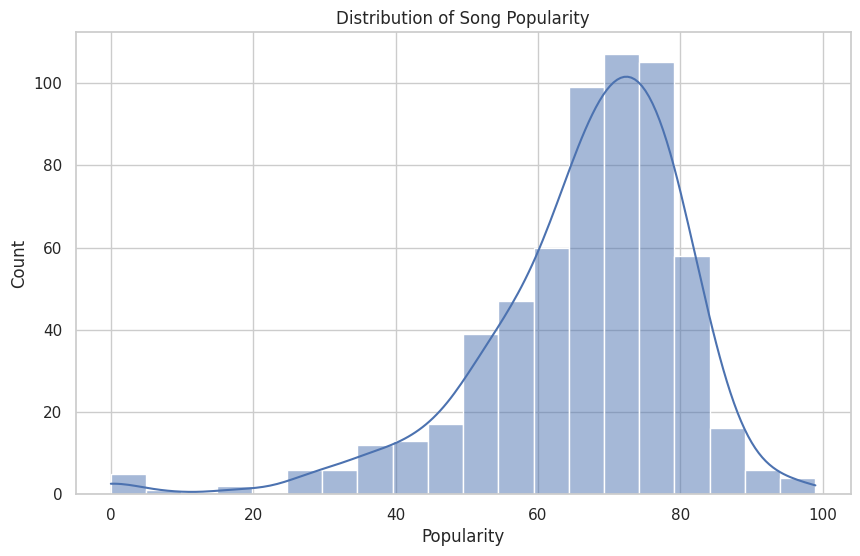

In [ ]:


# Setting up the visual style
sns.set(style="whitegrid")

# Distribution of Song Popularity
plt.figure(figsize=(10, 6))
sns.histplot(Spotify_db['pop'], bins=20, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


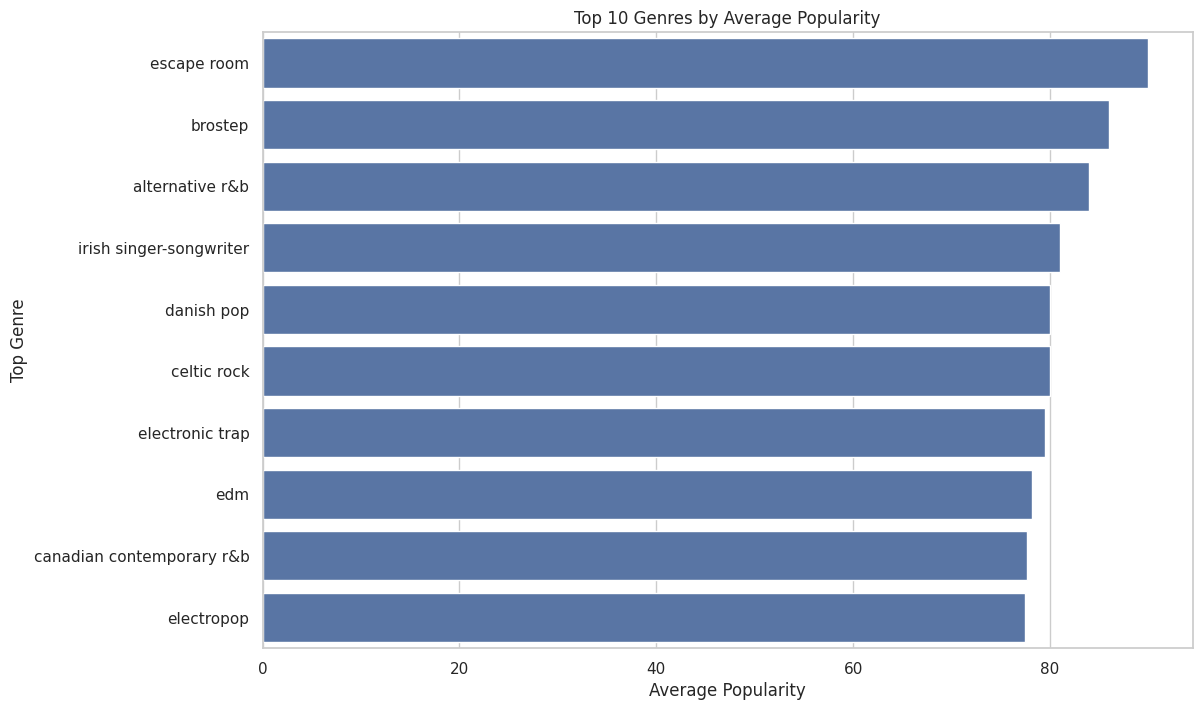

In [ ]:
# Top Genres by Average Popularity
plt.figure(figsize=(12, 8))
top_genres_popularity_plot = Spotify_db.groupby('top genre')['pop'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_popularity_plot.values, y=top_genres_popularity_plot.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Top Genre')
plt.show()


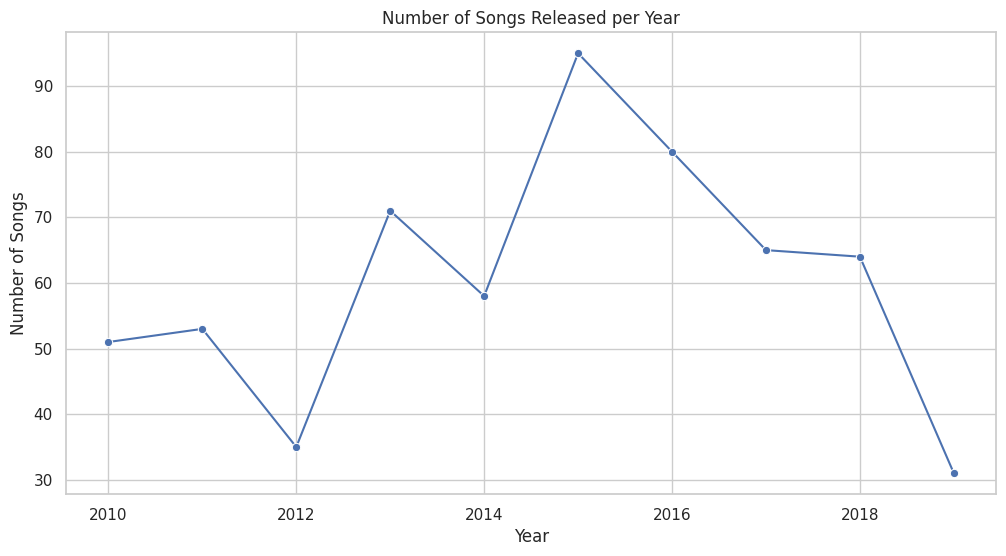

In [ ]:
# Number of Songs Released per Year
plt.figure(figsize=(12, 6))
songs_per_year_plot = Spotify_db['year'].value_counts().sort_index()
sns.lineplot(x=songs_per_year_plot.index, y=songs_per_year_plot.values, marker='o')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


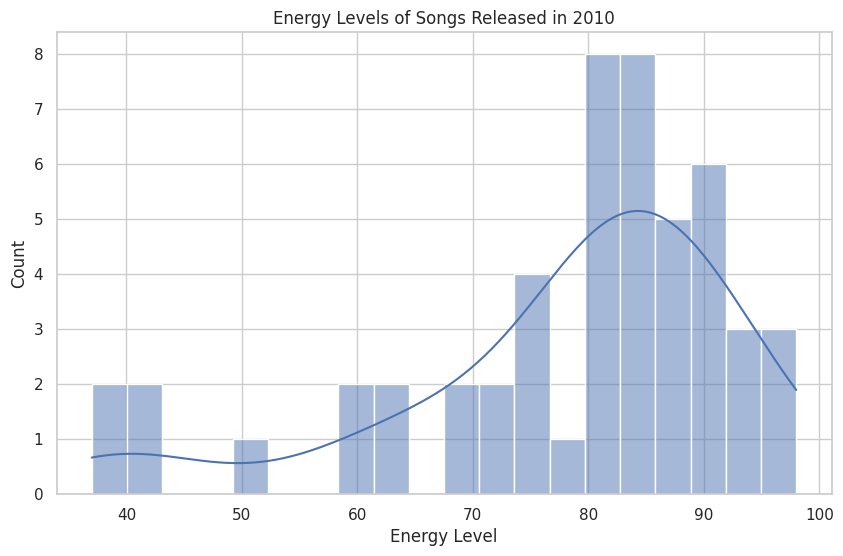

In [ ]:
# Energy Levels of Songs Released in 2010
plt.figure(figsize=(10, 6))
songs_2010 = Spotify_db[Spotify_db['year'] == 2010]
sns.histplot(songs_2010['nrgy'], bins=20, kde=True)
plt.title('Energy Levels of Songs Released in 2010')
plt.xlabel('Energy Level')
plt.ylabel('Count')
plt.show()


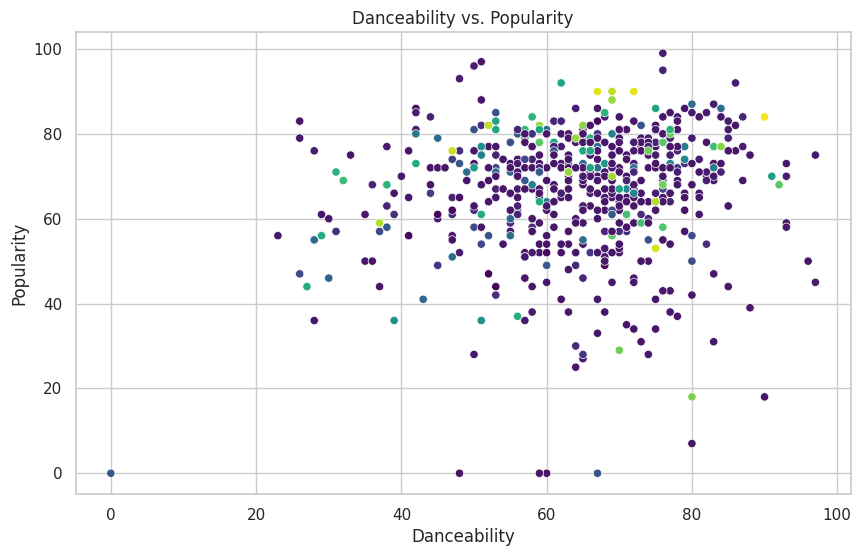

In [ ]:
# Danceability vs. Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Spotify_db, x='dnce', y='pop', hue='top genre', palette='viridis', legend=False)
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()
